In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture
import warnings

warnings.filterwarnings("ignore")

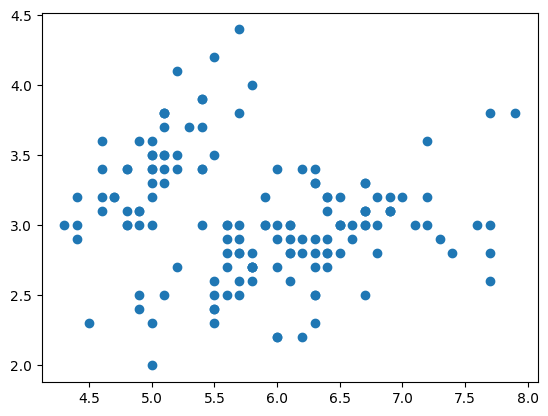

In [6]:
# load the iris dataset
iris = datasets.load_iris()

# select first two columns
X = iris.data[:, :2]

# turn it into a dataframe
d = pd.DataFrame(X)

# plot the data
plt.scatter(d[0], d[1])

In [7]:
def model(opt):
    gmm = GaussianMixture(n_components=opt["n_components"])
    gmm.fit(d)
    # Assign a label to each sample
    labels = gmm.predict(d)
    d["labels"] = labels
    d0 = d[d["labels"] == 0]
    d1 = d[d["labels"] == 1]
    d2 = d[d["labels"] == 2]

    # plot three clusters in same plot
    plt.scatter(d0[0], d0[1], c="r")
    plt.scatter(d1[0], d1[1], c="yellow")
    plt.scatter(d2[0], d2[1], c="g")

    # print the converged log-likelihood value
    return gmm.lower_bound_.mean()

    # print the number of iterations needed
    # for the log-likelihood value to converge
    return gmm.n_iter_.mean()


Results: 'model'  
   Best score: 4.6114458394573585  
   Best parameter set:
      'n_components' : 9  
   Best iteration: 6  
 
   Random seed: 737808454  
 
   Evaluation time   : 1.2670788764953613 sec    [98.78 %]
   Optimization time : 0.015654563903808594 sec    [1.22 %]
   Iteration time    : 1.28273344039917 sec    [15.59 iter/sec]
 


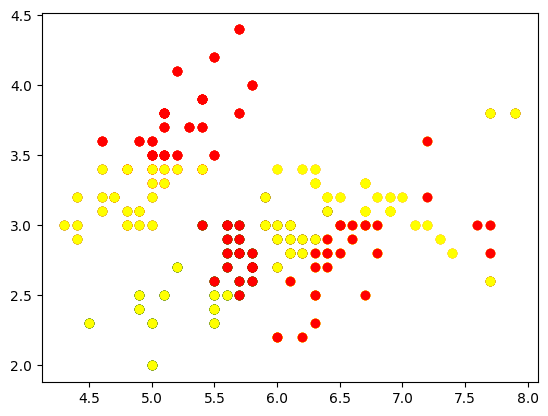

In [8]:
from hyperactive import Hyperactive

search_space = {"n_components": list(range(2, 10))}

hyper = Hyperactive()
hyper.add_search(model, search_space, n_iter=20)
hyper.run()